<a href="https://colab.research.google.com/github/nadakhelif/CNN_tp_deep_learning/blob/main/tp1_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Nada Khelif -  Chaima bouhlel  - Ahmed Frikha
### TP N°1 : Perceptron mono-couche

1. Algorithme :

2. Dataset :

Text(0.5, 1.0, 'Random Classification Data with 2 classes')

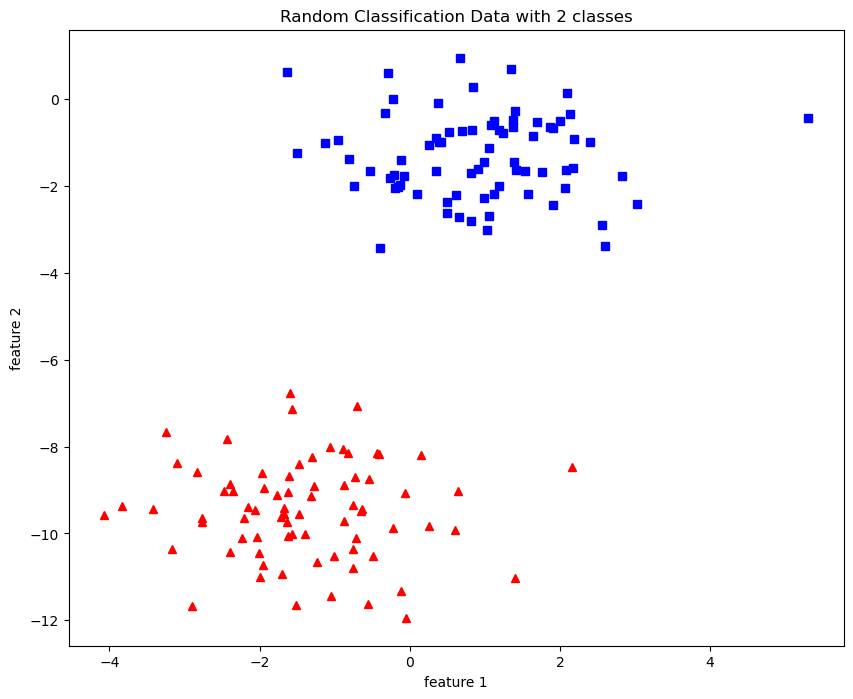

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

from sklearn import datasets
X, y = datasets.make_blobs (n_samples=150, n_features=2,
centers=2, cluster_std=1.05,
random_state=2)
#Plotting
fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Random Classification Data with 2 classes')

3. Implémentation :
    Code de la fonction d’activation de Heaviside

In [ ]:
def acti_func(z):
    return (1.0 if z > 0 else 0.0)

 l’algorithme de perceptron

In [ ]:
def perceptron(X, y, lr, epochs):
    # X --> Inputs.
    # y --> labels/target.
    # lr --> learning rate.
    # epochs --> Number of iterations.
    # m-> number of training examples
    # n-> number of features
    m, n = X.shape
    # Initializing parameters(theta) to zeros.
    # +1 in n+1 for the bias term.
    w = np.zeros((n+1,1))
    # Empty list to store how many examples were
    # misclassified at every iteration.
    n_miss_list = []
    # Training.
    for epoch in range(epochs):
    # variable to store #misclassified.
        n_miss = 0
        # looping for every example.
        for idx, x_i in enumerate(X):
            # Insering 1 for bias, X0 = 1.
            x_i = np.insert(x_i, 0, 1).reshape(-1,1)
            # Calculating prediction/hypothesis.
            y_hat = acti_func(np.dot(x_i.T, w))
            # Updating if the example is misclassified.
            if (np.squeeze(y_hat) - y[idx]) != 0:
                w  += lr * (y[idx] - y_hat) * x_i
                n_miss += 1

        # Appending number of misclassified examples
        # at every iteration.
        n_miss_list.append(n_miss)
    return w, n_miss_list

 la limite de décision:

In [ ]:
def plot_decision_boundary(X, w):
# X --> Inputs
# w --> parameters
# The Line is y=mx+c
# So, Equate mx+c = w0.X0 + w1.X1 + w2.X2
# Solving we find m and c
    x1 = [min(X[:,0]), max(X[:,0])]
    m = - w[1]/w[2]
    c = - w[0]/w[2]
    x2 = m*x1 + c
    plt.plot(x1,x2)
    plt.show()


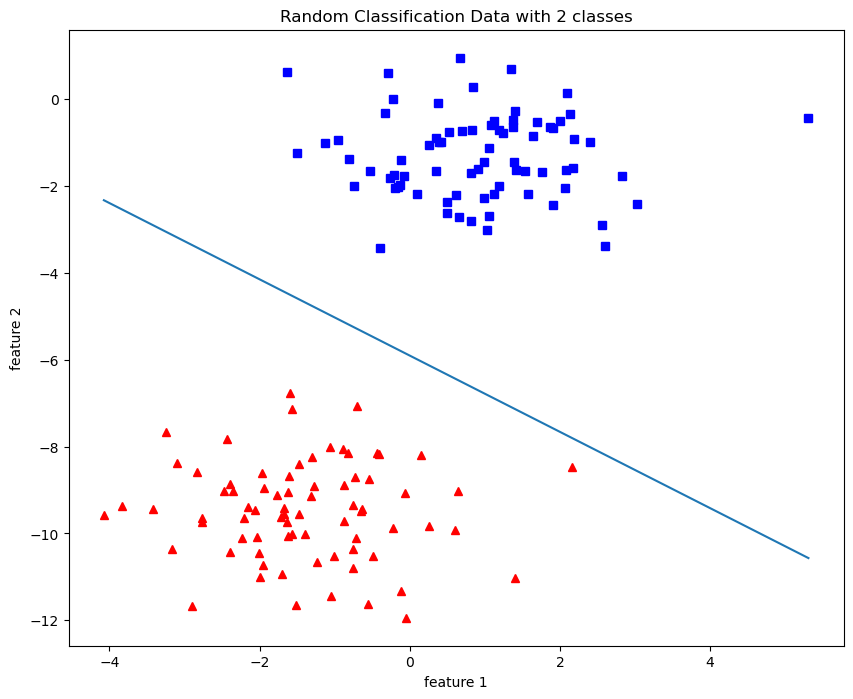

In [ ]:
w,n_miss_list = perceptron(X,y,0.01,100)
fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Random Classification Data with 2 classes')
plot_decision_boundary(X,w)

### II. Compte rendu

Experience 1:

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

#Générer un dataset

X1, _ = make_blobs(n_samples=125, centers=[(-1,0)], cluster_std=0.5, random_state=1)
X2, _ = make_blobs(n_samples=125, centers=[(1,0)], cluster_std=0.5, random_state=1)
X = np.concatenate([X1, X2])
y = np.concatenate([-np.ones(125), np.zeros(125)])

# We set the cluster_std parameter to 0.5, which controls the standard deviation of the generated samples.
#Since we want the variance of both classes to be equal to 0.25

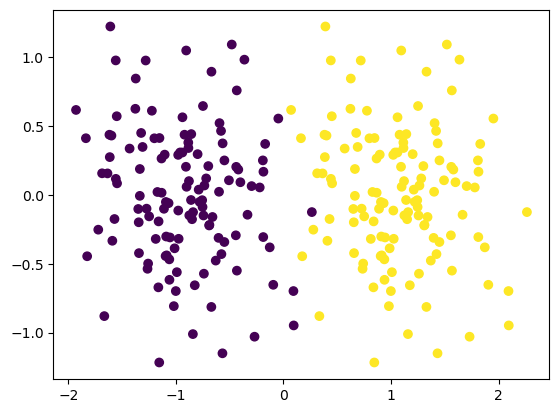

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [ ]:
# Mélanger les données et diviser en train et test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
def acti_func1(z):
    return (0.0 if z >= 0 else -1.0)


In [ ]:
# Implémenter l'algorithme de perceptron
def perceptron2(X_train, y_train, iteration, lr):
    n, d = X_train.shape
    w = np.zeros((d+1,1))
    #w = np.ones((d+1,1))
    for i in range(iteration):
        # Parcourir les exemples d'apprentissage
        for idx, x_i in enumerate(X_train):
            # Insering 1 for bias, X0 = 1.
            x_i = np.insert(x_i, 0, 1).reshape(-1,1)
            # Calculating prediction/hypothesis.
            y_hat = acti_func1(np.dot(x_i.T, w))
            # Updating if the example is misclassified.
            if (np.squeeze(y_hat) - y_train[idx]) != 0:
                w  += lr * (y_train[idx] - y_hat) * x_i


    return w


In [ ]:
#Entraîner un modèle de perceptron sur les données d'apprentissage
w = perceptron2(X_train, y_train,100,0.1)



a. l'algorithme va converger puisqu'on lui a define qu'une condition d'arrêt (un nombre maximum d'itérations)

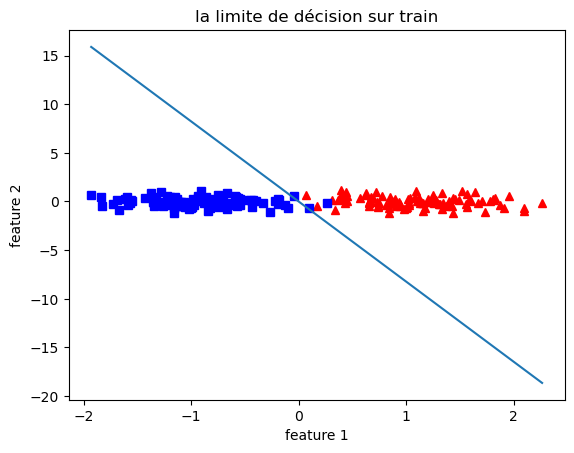

In [ ]:
def plot_decision_boundary(X, w):
# X --> Inputs
# w --> parameters
# The Line is y=mx+c
# So, Equate mx+c = w0.X0 + w1.X1 + w2.X2
# Solving we find m and c
    x1 = [min(X[:,0]), max(X[:,0])]
    m = - w[1]/w[2]
    c = - w[0]/w[2]
    x2 = m*x1 + c
    plt.plot(x1,x2)
    plt.show()

fig = plt.figure()
plt.plot(X_train[:, 0][y_train == 0], X_train[:, 1][y_train == 0], 'r^')
plt.plot(X_train[:, 0][y_train == -1], X_train[:, 1][y_train == -1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('la limite de décision sur train')
plot_decision_boundary(X,w)

b.meme si on a modifierl'initialisation du vecteur w avec des 1 rien ne change

c. Calculer la justesse (accuracy) de la classification sur l'ensemble de test.

In [ ]:
from sklearn.metrics import accuracy_score
y_pred =np.zeros((50,1))

for idx, x_i in enumerate(X_test):
      # Insering 1 for bias, X0 = 1.
        x_i = np.insert(x_i, 0, 1).reshape(-1,1)
      # Calculating prediction/hypothesis.
        y_pred[idx]= acti_func1(np.dot(x_i.T, w))



# Calculer la précision de classification sur les données de test
accuracy = accuracy_score(y_pred , y_test)
print("Accuracy: {:.2f}%".format(accuracy*100 ))

Accuracy: 100.00%


Tracez la limite de décision sur l'ensemble de test.

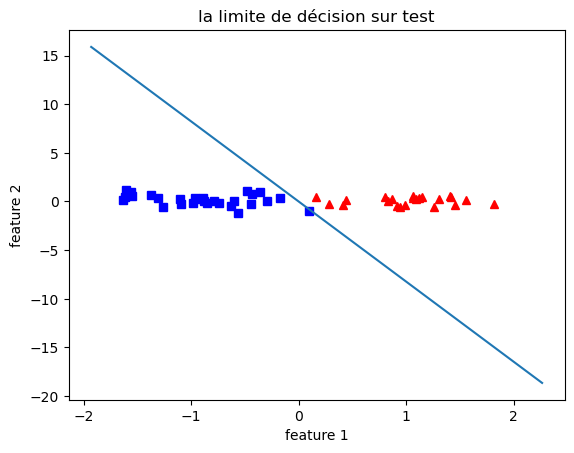

In [ ]:
fig = plt.figure()
plt.plot(X_test[:, 0][y_test == 0], X_test[:, 1][y_test == 0], 'r^')
plt.plot(X_test[:, 0][y_test == -1], X_test[:, 1][y_test == -1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('la limite de décision sur test')
plot_decision_boundary(X,w)

Expérience 2

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

#Générer un dataset

X1, _ = make_blobs(n_samples=125, centers=[(-1,0)], cluster_std=0.866, random_state=1)
X2, _ = make_blobs(n_samples=125, centers=[(1,0)], cluster_std=0.866, random_state=1)
X = np.concatenate([X1, X2])
y = np.concatenate([-np.ones(125), np.zeros(125)])

# We set the cluster_std parameter to 0.5, which controls the standard deviation of the generated samples.
#Since we want the variance of both classes to be equal to 0.25

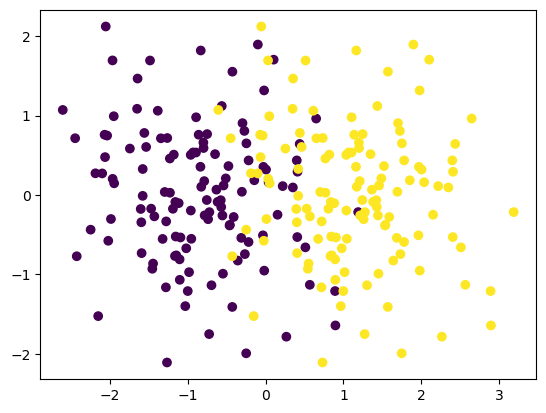

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

d.  l'algorithme va converger puisqu'on lui a define qu'une condition d'arrêt (un nombre maximum d'itérations)

e.Tracez la limite de décision trouvée par votre algorithme. Cette limite de décision est-elle unique ? La modification de l'initialisation modifie-t-elle le résultat de l'algorithme ?

In [ ]:
# Mélanger les données et diviser en train et test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
w = perceptron2(X_train, y_train,100,0.1)

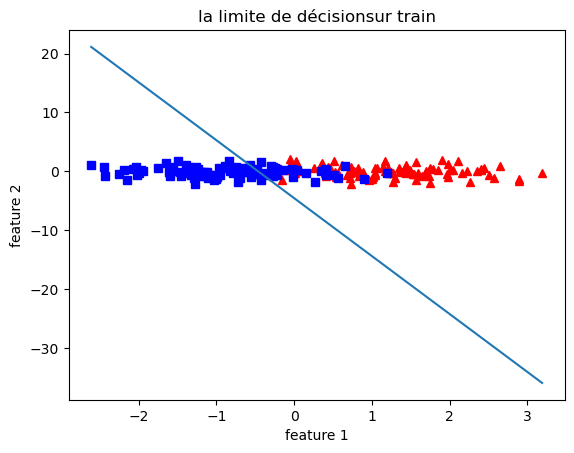

In [ ]:
fig = plt.figure()
plt.plot(X_train[:, 0][y_train == 0], X_train[:, 1][y_train == 0], 'r^')
plt.plot(X_train[:, 0][y_train == -1], X_train[:, 1][y_train == -1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('la limite de décisionsur train')
plot_decision_boundary(X,w)

f. Calculer la justesse (accuracy) de la classification sur l'ensemble de test. Tracez la
limite de décision sur l'ensemble de test.

In [ ]:
from sklearn.metrics import accuracy_score
y_pred =np.zeros((50,1))
for idx, x_i in enumerate(X_test):
            # Insering 1 for bias, X0 = 1.
            x_i = np.insert(x_i, 0, 1).reshape(-1,1)
            # Calculating prediction/hypothesis.
            y_pred[idx]= acti_func(np.dot(x_i.T, w))



# Calculer la précision de classification sur les données de test
accuracy = accuracy_score(y_pred , y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 80.00%


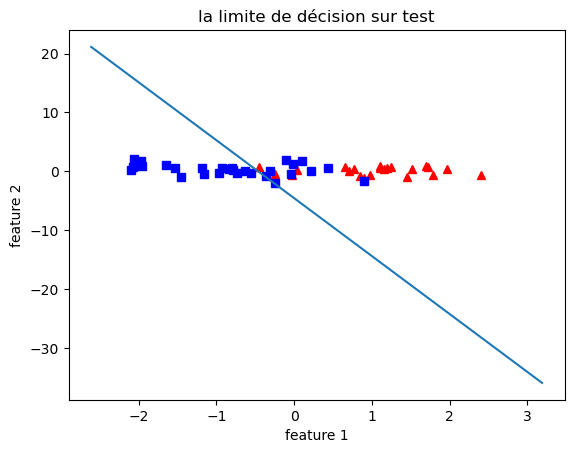

In [ ]:
fig = plt.figure()
plt.plot(X_test[:, 0][y_test == 0], X_test[:, 1][y_test == 0], 'r^')
plt.plot(X_test[:, 0][y_test == -1], X_test[:, 1][y_test == -1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('la limite de décision sur test')
plot_decision_boundary(X,w)

Expérience 3

Running experiments for sigma=0.01
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
0.0
Running experiments for sigma=0.1
[0.   0.   0.02 0.   0.   0.   0.   0.   0.02 0.   0.   0.   0.02 0.
 0.02 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.02
 0.02 0.  ]
0.0040000000000000036
Running experiments for sigma=0.5
[0.12 0.14 0.08 0.08 0.08 0.06 0.04 0.16 0.12 0.06 0.1  0.08 0.28 0.18
 0.16 0.04 0.04 0.14 0.12 0.14 0.12 0.18 0.1  0.02 0.18 0.06 0.1  0.04
 0.06 0.04]
0.10400000000000004
Running experiments for sigma=0.7
[0.16 0.16 0.14 0.08 0.12 0.08 0.06 0.22 0.1  0.12 0.12 0.14 0.24 0.24
 0.24 0.1  0.12 0.14 0.14 0.24 0.18 0.24 0.16 0.1  0.18 0.08 0.12 0.14
 0.1  0.14]
0.14666666666666664


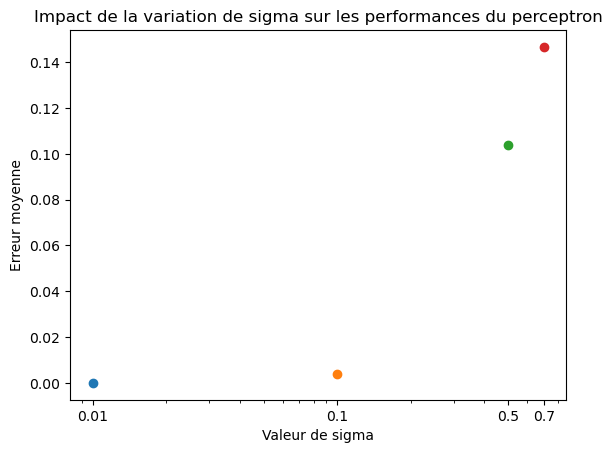

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Paramètres
tab=np.zeros(4)
e= 0
nb_exp = 30
sigma_values = [0.01, 0.1, 0.5, 0.7]

# Stockage des erreurs pour chaque expérience
errors = np.zeros((len(sigma_values), nb_exp))

# Boucle sur les valeurs de sigma
for i, sigma in enumerate(sigma_values):
    print(f"Running experiments for sigma={sigma}")

    # Répéter l'expérience nb_exp fois
    for j in range(nb_exp):

        # Génération des données
        X1, _ = make_blobs(n_samples=125, centers=[(-1,0)], cluster_std=np.sqrt(sigma), random_state=j)
        X2, _ = make_blobs(n_samples=125, centers=[(1,0)], cluster_std=np.sqrt(sigma), random_state=j)
        X = np.concatenate([X1, X2])
        y = np.concatenate([-np.ones(125), np.zeros(125)])

        # Division en ensembles de train et de test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=j)

        # Initialisation des poids
        n, d = X_train.shape
        w = np.zeros((d+1,1))

        # Algorithme de perceptron
        lr = 0.1
        max_iter = 100
        for k in range(max_iter):
        # Parcourir les exemples d'apprentissage
            for idx, x_i in enumerate(X_train):
                # Insering 1 for bias, X0 = 1.
                x_i = np.insert(x_i, 0, 1).reshape(-1,1)
                # Calculating prediction/hypothesis.
                y_hat = acti_func1(np.dot(x_i.T, w))
                # Updating if the example is misclassified.
                if (np.squeeze(y_hat) - y_train[idx]) != 0:
                    w  += lr * (y_train[idx] - y_hat) * x_i
            y_pred =np.zeros((50,1))
            for idx, x_i in enumerate(X_test):
                # Insering 1 for bias, X0 = 1.
                x_i = np.insert(x_i, 0, 1).reshape(-1,1)
                # Calculating prediction/hypothesis.
                y_pred[idx]= acti_func1(np.dot(x_i.T, w))
            accuracy = accuracy_score(y_test, y_pred)
            errors[i, j]=(1-accuracy)

           # e = e + errors[i, j]
        #tab[i]=e/30





    print(errors[i])
    mean_error = errors[i].mean()

    #std_error = np.std(errors[i])
    #for l in range (30):
     #    e = e+ errors[i,l]

    #mean_error =  e/30
    print(mean_error)



    # Affichage des résultats
    plt.errorbar(sigma, mean_error,fmt='-o', capsize=5)
    plt.title("Impact de la variation de sigma sur les performances du perceptron")
    plt.xlabel("Valeur de sigma")
    plt.ylabel("Erreur moyenne")
    plt.xscale("log")
    plt.xticks(sigma_values, sigma_values)
    plt.grid()

plt.show()



on remarque que  a chaque fois que la variance augmente le taux d'erreur augmente ce qui est logique a cause de sur-apprentissage du modele